# Project: Investigate a Dataset - [No-show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
- Patient's ID, gender and age.
- The Neighbourhood in which the hospital is located.
- Some specific medical condition such as:
    - Hipertension
    - Diabetes
    - Alcoholism
    - Handcap
- Whether the patient is enrolled in the Brasilian welfare program (Bolsa Familia) or not.
- Whether the patient received an SMS for the appointment or not.


### Question(s) for Analysis

> Below are the questions that I will be using to help me explore the dataset and find intersting facts related to it: 
1. Which gender/age group is more likely to miss an appointment?
2. Which neighbourhoods have the highest/lowest rates of no shows?
3. Which medical condition is missing appointments the most/least?
4. Which day of the week has the most/least attendance rate?
5. Does receiving a sms before appointments help in lowering the no show rates?

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
#loading the dataset
 
file_path = 'Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv'
df = pd.read_csv(file_path)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- It seems that our dataset has no null values. 
- We can see also that 'ScheduledDay' and 'AppointmentDay' columns are strings.
- 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap' and 'SMS_received' columns are all integers.

In [4]:
df.shape

(110527, 14)

The dataset consists of 110527 rows and 14 columns

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We can learn some intersting facts just by exampining the output of the 'descirbe()' method.
Below are some observations:
- Age:
 - The mean patients' age is 37, where max age is 115.
 - Most patients are between 18 and 55.
 - Minimum age is -1 which is impossible, therefore, we will do something about it.

- Scholarship:
  - It seems like most of the patients are not enrolled in the Brasilian welfare program (~90%).
  - Column's dtype is int64 and min/max are 0/1, thus, no modification needed.

- Hipertension, diabetes, and alcoholism:
  - It seems that most of the patients in the dataset don't suffer from these conditions.
  - Since columns dtype is int64 and the min/max are 0/1, this means that there are no modification needed.

- Handcap:
    - Most patients aren't handicapped.
    - The number of handicaps can go up to 4. This needs to be modified

- SMS:
   - It seems that around 32% of patients receive messages before their appointment.

In [6]:
df.duplicated().sum()

0

No duplicates in the dataset which will make our analysis easier.

In [7]:
df['AppointmentID'].nunique()

110527

Making sure that all IDs are unique. 

In [8]:
df['PatientId'].nunique()

62299

We can see that there are patients that makes more than 1 appointments.

In [9]:
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

Making sure that there are only two values as expected.

In [10]:
df['Neighbourhood'].nunique()

81

In [11]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)


### Data Cleaning
> After exploring this dataset, we found the following improvements that can be done:
1. Deleting the 'AppointmentID' column as it serves no purpose in my investigation.
2. Changing all column labels to lowercase values and replacing any dash with underscore.
3. Changing the ScheduledDay and AppointmentDay columns to a datetime format.
4. Modifing any values of age that are not possible (<= 0) to 1.
5. Modifing higher values of handcap (> 1) to 1 for simplicity.

In [12]:
# Deleting the 'AppointmentID' column
df.drop(columns = 'AppointmentID', inplace=True)

#confirm changes
df.head(1)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [13]:
# Changing all column labels to lowercase values and replacing any dash with underscore
df.rename(columns=lambda x: x.strip().lower().replace('-', '_'), inplace=True)

#confirm changes
df.head(1)

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [14]:
# Changing 'scheduledday' to datetime type
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['day_scheduled'] = df['scheduledday'].dt.weekday_name #extracting the name of the weekday

# confirm changes
df.head(1)

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,day_scheduled
0,2.987250e+13,F,2016-04-29 18:38:08,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday


In [15]:
# Changing 'appointmentday' to datetime type
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df['day_appointment'] = df['appointmentday'].dt.weekday_name #extracting the name of the weekday

# confirm changes
df.head(1)

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,day_scheduled,day_appointment
0,2.987250e+13,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday


In [16]:
# changing the impossible values in the age column to 1
df['age'].replace([-1, 0], 1, inplace=True)

# confirm changes
df.query('age <= 0')

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,day_scheduled,day_appointment


In [17]:
# changing higher values to 1 in the handcap column
df['handcap'].replace([2, 3, 4], 1, inplace=True)

# confirm changes
df.query('handcap > 1')

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,day_scheduled,day_appointment


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which gender/age group is more likely to miss an appointment?)

In [18]:
# getting the total number of both males and females
females = df['gender'].value_counts()[0]
males = df['gender'].value_counts()[1]
females, males

(71840, 38687)

In [19]:
# Total number of no-shows by females
female_miss=df.query('gender == "F"')['no_show'].value_counts()['Yes']
female_miss

14594

In [20]:
# Total number of no-shows by females
male_miss=df.query('gender == "M"')['no_show'].value_counts()['Yes']
male_miss

7725

In [21]:
# getting the no show percentage of each gender
x1 = (female_miss / females) * 100
x2 = (male_miss / males) * 100
x1, x2

(20.314587973273941, 19.967947889471915)

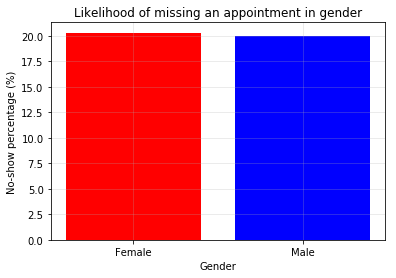

In [22]:
# plotting results
label1=['Female', "Male"]
data1= [x1, x2]
plt.bar(label1, data1, color=['red', 'blue'])
plt.title('Likelihood of missing an appointment in gender')
plt.xlabel('Gender')
plt.ylabel('No-show percentage (%)')
plt.grid(alpha=0.3);

We can see that females are more likely to miss an appointment, however, not by much.

In [23]:
# we will separate age into groups.

# first, view the min, 25%, 50%, 75%, max age
df['age'].describe()

count    110527.000000
mean         37.120912
std          23.059403
min           1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [24]:
# bin edges and it's labels
bin_edges = [1, 18, 37, 55, 115]
bin_names = ['Child/Teen', 'Young adults', 'Middle age', 'Elders']

In [25]:
# Creates age_groups column
df['age_groups'] = pd.cut(df['age'], bin_edges, labels=bin_names)
df.head()

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,day_scheduled,day_appointment,age_groups
0,2.987250e+13,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday,Elders
1,5.589978e+14,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday,Elders
2,4.262962e+12,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday,Elders
3,8.679512e+11,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday,Child/Teen
4,8.841186e+12,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday,Elders


In [26]:
# to get the total number of each group
age_num = df['age_groups'].value_counts()
age_num

Elders          27504
Young adults    27250
Middle age      26906
Child/Teen      23054
Name: age_groups, dtype: int64

In [27]:
# storing no-show rates into it's respective group
elders = df.query('age_groups == "Elders"')['no_show'].value_counts()['Yes']
elders

4303

In [28]:
young_adults = df.query('age_groups == "Young adults"')['no_show'].value_counts()['Yes']
young_adults

6414

In [29]:
middle_age = df.query('age_groups == "Middle age"')['no_show'].value_counts()['Yes']
middle_age

5255

In [30]:
child_teen = df.query('age_groups == "Child/Teen"')['no_show'].value_counts()['Yes']
child_teen

5293

In [31]:
# getting the no-show percentage to have accurate representation
elders_percent = (elders / age_num[0]) * 100
young_adults_percent = (young_adults / age_num[1]) * 100
middle_age_percent = (middle_age/ age_num[2]) * 100
child_teen_percent = (child_teen/ age_num[3]) * 100

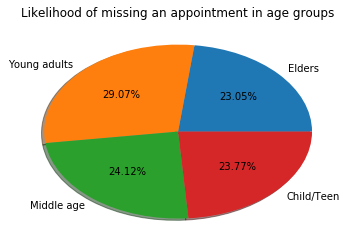

In [32]:
# plotting the results
data2 = [elders_percent, young_adults_percent, middle_age_percent, child_teen_percent]
plt.pie(data2, labels= age_num.index, autopct='%.2f%%', shadow=True)
plt.title('Likelihood of missing an appointment in age groups');

As we can see here, the young adults (ages between 19 and 37) are more likely to miss an appointment.

### Research Question 2  (Which neighbourhoods have the highest/lowest rates of no shows?)

In [33]:
# get the number of no shows for each neighbourhood
noshows = df.query('no_show == "Yes"').groupby('neighbourhood').count()['no_show']
noshows.head()

neighbourhood
AEROPORTO                1
ANDORINHAS             521
ANTÔNIO HONÓRIO         50
ARIOVALDO FAVALESSA     62
BARRO VERMELHO          91
Name: no_show, dtype: int64

In [34]:
# total number of visits in each neighbourhood
total_visits = df['neighbourhood'].value_counts()
total_visits.head()

JARDIM CAMBURI     7717
MARIA ORTIZ        5805
RESISTÊNCIA        4431
JARDIM DA PENHA    3877
ITARARÉ            3514
Name: neighbourhood, dtype: int64

In [35]:
# Percentage of no shows in each city
noshow_percentage = noshows / total_visits
noshow_percentage.head()

AEROPORTO              0.125000
ANDORINHAS             0.230327
ANTÔNIO HONÓRIO        0.184502
ARIOVALDO FAVALESSA    0.219858
BARRO VERMELHO         0.215130
dtype: float64

In [36]:
# check if there is any null values (zero-percent no show)
noshow_percentage.isnull().any()

True

In [37]:
# replacing null with zero
noshow_percentage.fillna(0, inplace= True)

# confirm changes
noshow_percentage.isnull().any()

False

In [38]:
# sorting values to get the highest and lowest percentage
noshow_percentage.sort_values(inplace=True)

In [39]:
highest_noshow = noshow_percentage.tail() * 100
lowest_noshow = noshow_percentage.head() * 100

In [40]:
# checking index
highest_noshow.index, lowest_noshow.index

(Index(['ITARARÉ', 'SANTA CLARA', 'SANTA CECÍLIA', 'SANTOS DUMONT',
        'ILHAS OCEÂNICAS DE TRINDADE'],
       dtype='object'),
 Index(['PARQUE INDUSTRIAL', 'ILHA DO BOI', 'AEROPORTO', 'MÁRIO CYPRESTE',
        'SOLON BORGES'],
       dtype='object'))

In [41]:
# renaming index to make it shorter
highest_noshow.rename(index={'ILHAS OCEÂNICAS DE TRINDADE': 'ILHAS TRINDADE'}, inplace=True)

# confirm changes
highest_noshow.index

Index(['ITARARÉ', 'SANTA CLARA', 'SANTA CECÍLIA', 'SANTOS DUMONT',
       'ILHAS TRINDADE'],
      dtype='object')

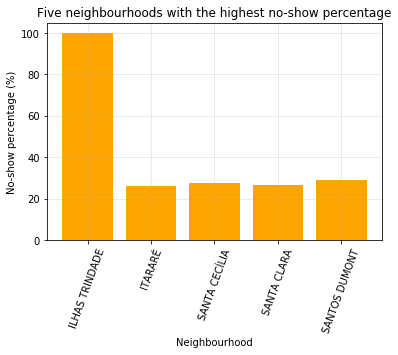

In [42]:
# plotting the results
plt.bar(highest_noshow.index, highest_noshow, color='orange')
plt.xticks(rotation=70)
plt.title('Five neighbourhoods with the highest no-show percentage')
plt.xlabel('Neighbourhood')
plt.ylabel('No-show percentage (%)')
plt.grid(alpha=0.3);

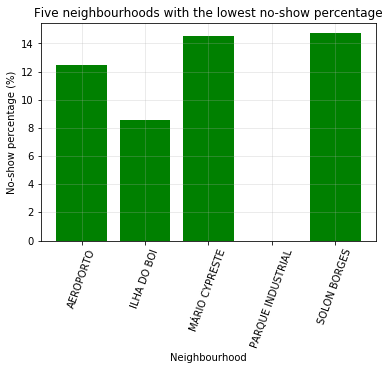

In [43]:
plt.bar(lowest_noshow.index, lowest_noshow, color='green')
plt.xticks(rotation=70)
plt.title('Five neighbourhoods with the lowest no-show percentage')
plt.xlabel('Neighbourhood')
plt.ylabel('No-show percentage (%)')
plt.grid(alpha=0.3);

Parque Industrial and Ilha do Boi have the highest attendance rate, while, Santos Dumont and Ilhas Oceanicas de Trindade have the worst.

### Research Question 3  (Which medical condition is missing appointments the most/least?)

In [44]:
# creating a dataframe for the needed values
medical_cond = df[['hipertension', 'diabetes', 'alcoholism', 'handcap', 'no_show']].query('no_show == "Yes"')
medical_cond.head()

,hipertension,diabetes,alcoholism,handcap,no_show
6,0,0,0,0,Yes
7,0,0,0,0,Yes
11,0,0,0,0,Yes
17,0,0,0,0,Yes
20,0,0,0,0,Yes


In [45]:
# creating a function to get the percentage of each condition and create a list combining each category
def filter1(df, conditions):
    '''  
    This function takes a dataframe and medical conditions as inputs.
    Returns a pandas series for the no-show percentage for patients with and without medical conditions.
    
    '''
    with_cond = []
    without_cond = []
    for condition in conditions:
        evaluate=(df[condition].value_counts() / df['no_show'].count()) * 100
        with_cond.append(evaluate[1])
        without_cond.append(evaluate[0])
    data= [with_cond, without_cond]
    series = pd.Series(data, index= ['with', 'without'])
    return series

In [46]:
# getting the required stats for each medical condition
conditions = ['hipertension','diabetes','alcoholism','handcap'] #input conditions
percentage = filter1(medical_cond, conditions)

# confirm operation
percentage

with       [16.9003987634, 6.40709709216, 3.03329002195, ...
without    [83.0996012366, 93.5929029078, 96.966709978, 9...
dtype: object

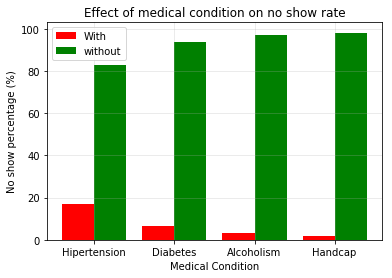

In [47]:
# plotting results
ind = np.arange(4)
names = [condition.title() for condition in conditions] #labels
width = 0.4
plt.bar(ind, percentage['with'], width, color = 'red', label = 'With')
plt.bar(ind + width, percentage['without'], width, color = 'green', label = 'without')
plt.title('Effect of medical condition on no show rate')
plt.xlabel('Medical Condition')
plt.ylabel('No show percentage (%)')
locations = ind + width / 2  # xtick locations
plt.xticks(locations, names)
plt.legend()
plt.grid(alpha=0.3);

Unexpectedly, we can see that the majority of noshows comes from patients without medical conditions.

### Research Question 4  (Which day of the week has the most/least attendance rate?)

Lets explore a little bit and find when people schedule the most? Is it weekdays or weekends?

In [48]:
df['day_scheduled'].unique() #To see what are the days we are dealing with

array(['Friday', 'Wednesday', 'Tuesday', 'Thursday', 'Monday', 'Saturday'], dtype=object)

In [49]:
#number of scheduled appointments for each day
scheduled= df['day_scheduled'].value_counts()
scheduled

Tuesday      26168
Wednesday    24262
Monday       23085
Friday       18915
Thursday     18073
Saturday        24
Name: day_scheduled, dtype: int64

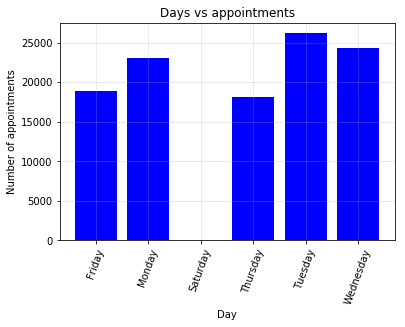

In [50]:
# plotting the data to have better visualization
plt.bar(scheduled.index, scheduled, color ='blue')
plt.xticks(rotation=70)
plt.title('Days vs appointments')
plt.xlabel('Day')
plt.ylabel('Number of appointments')
plt.grid(alpha=0.3);

Looks like that most appointments happens in the weekdays. Interesting!

> Okay, so lets find out which day has the highest/lowest no show rates.

In [51]:
# filterring to get the appointment day and no show values
appoint_day = df[['day_appointment', 'no_show']].query('no_show == "Yes"')
appoint_day.head()

,day_appointment,no_show
6,Friday,Yes
7,Friday,Yes
11,Friday,Yes
17,Friday,Yes
20,Friday,Yes


In [52]:
# Percentage of no show for each day relative to the total scheduled appointments of that day
noshow_day=(appoint_day['day_appointment'].value_counts() / scheduled) * 100
noshow_day

Tuesday      19.688169
Wednesday    20.991674
Monday       20.316223
Friday       21.342850
Thursday     18.469540
Saturday     37.500000
dtype: float64

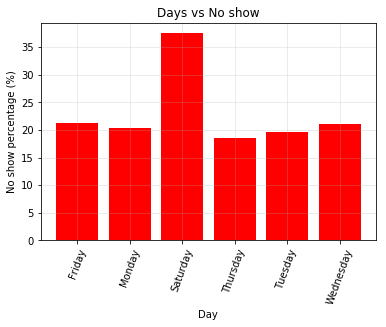

In [53]:
# plotting the results
plt.bar(noshow_day.index, noshow_day, color ='red')
plt.xticks(rotation=70)
plt.title('Days vs No show')
plt.xlabel('Day')
plt.ylabel('No show percentage (%)')
plt.grid(alpha=0.3);

We can see that Saturday has the highest no show rates while Thursday is the lowest.

### Research Question 5  (Does receiving a sms before appointments help in lowering the no show rates?)

In [54]:
# filterring to get the sms_received and no show values
sms = df[['sms_received', 'no_show']].query('sms_received == 1')
sms.head()

,sms_received,no_show
11,1,Yes
15,1,No
18,1,No
22,1,Yes
25,1,No


In [55]:
# getting the sms effect in percentage
sms_effect=(sms['no_show'].value_counts() / sms['sms_received'].count()) * 100
sms_effect

No     72.425455
Yes    27.574545
Name: no_show, dtype: float64

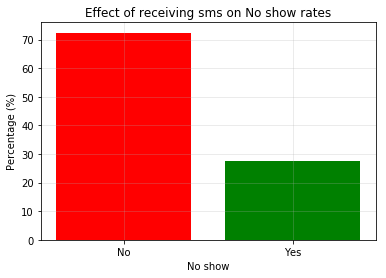

In [56]:
# plotting the results
plt.bar(sms_effect.index, sms_effect, color =['red', 'green'])
plt.title('Effect of receiving sms on No show rates')
plt.xlabel('No show')
plt.ylabel('Percentage (%)')
plt.grid(alpha=0.3);

Given the above figure, we can see that no show percentage is lower if the patient receives SMS.

<a id='conclusions'></a>
## Conclusions

Given all the above exploration and finding, a couple of points were observed:
1. Number of female patients are approx. double the males, however, no-show rates are almost the same.
2. Young adults are more likely to miss an appointment, however, elders has the lowest no-show rates.
3. Parque Industrial and Ilha do Boi have the highest attendance rate, while, Santos Dumont and Ilhas Oceanicas have the worst.
4. Unexpectedly, having a medical condition doesn't affect your no-show rates, infact, patients with no medical condition have much worse attendence rate.
5. Most scheduled appointments happens in the weekdays.
6. Saturday suffers from the lowest scheduled appointments and attendance stats.
7. Receiving SMS helps in lowering the no-show rates.
8. Most of the patients are not enrolled in the Brasilian welfare program (~90%).


### Limitations
In my opinion, the most notable limitations in my exploration is the short timespan of the gathered data. In order to judge and find more accurte trends, the data has to have a longer time timespan.


## Submitting your Project 

In [57]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0